In [21]:
import pandas as pd

# Specify the file path (replace with the actual path to your data.csv file)
file_path = r"C:\Users\Pulkit Sharma\Desktop\data.csv"

# Read data into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the number of rows in the DataFrame
num_rows = len(data)
print(f"Number of rows: {num_rows}")

# Display the contents of the DataFrame
print("\nDataFrame contents:")
print(data)

Number of rows: 117

DataFrame contents:
     YEAR  Rainfall in June
0    1901              22.7
1    1902              59.9
2    1903              26.2
3    1904              53.4
4    1905              23.1
..    ...               ...
112  2011             119.5
113  2012              21.7
114  2013             155.0
115  2014              31.3
116  2015              90.6

[117 rows x 2 columns]


In [22]:
data = pd.read_csv(r"C:\Users\Pulkit Sharma\Desktop\data.csv")
# Display descriptive statistics
descriptive_stats = data.describe()

# Extract specific statistics like mean, median, and standard deviation
mean_value = descriptive_stats.loc['mean']
median_value = data.median()
std_dev_value = descriptive_stats.loc['std']

# Display the extracted statistics
print(f"Mean:\n{mean_value}\n")
print(f"Median:\n{median_value}\n")
print(f"Standard Deviation:\n{std_dev_value}\n")

# Display the full descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

Mean:
YEAR                1958.606838
Rainfall in June      72.957522
Name: mean, dtype: float64

Median:
YEAR                1959.0
Rainfall in June      69.9
dtype: float64

Standard Deviation:
YEAR                33.389023
Rainfall in June    35.968989
Name: std, dtype: float64

Descriptive Statistics:
              YEAR  Rainfall in June
count   117.000000        113.000000
mean   1958.606838         72.957522
std      33.389023         35.968989
min    1901.000000         17.700000
25%    1930.000000         48.500000
50%    1959.000000         69.900000
75%    1987.000000         90.600000
max    2015.000000        161.000000


In [24]:
# Impute missing values in the 'rainfall' column with the median value
median_rainfall = data['Rainfall in June'].median()
data['Rainfall in June'] = data['Rainfall in June'].fillna(median_rainfall)

# Display the DataFrame after imputation
print("DataFrame after imputation:")
print(data)

DataFrame after imputation:
     YEAR  Rainfall in June
0    1901              22.7
1    1902              59.9
2    1903              26.2
3    1904              53.4
4    1905              23.1
..    ...               ...
112  2011             119.5
113  2012              21.7
114  2013             155.0
115  2014              31.3
116  2015              90.6

[117 rows x 2 columns]


In [25]:
# Remove duplicate rows
data_no_duplicates = data.drop_duplicates()

# Display the DataFrame after removing duplicates
print("DataFrame after removing duplicates:")
print(data_no_duplicates)

DataFrame after removing duplicates:
     YEAR  Rainfall in June
0    1901              22.7
1    1902              59.9
2    1903              26.2
3    1904              53.4
4    1905              23.1
..    ...               ...
112  2011             119.5
113  2012              21.7
114  2013             155.0
115  2014              31.3
116  2015              90.6

[115 rows x 2 columns]


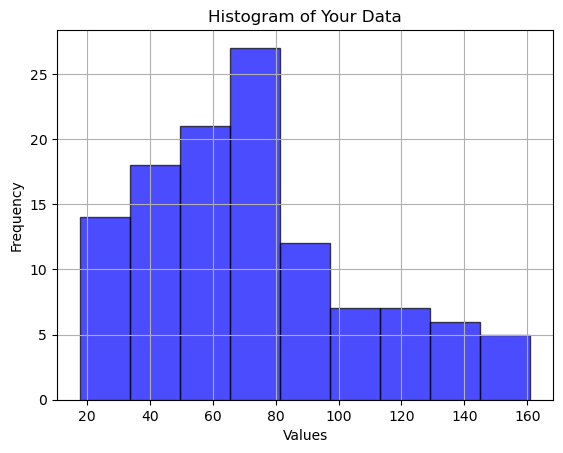

Mean: 72.85299145299146
Median: 69.9
The distribution is skewed to the right.


In [27]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(data['Rainfall in June'], bins='auto', alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Your Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate mean and median
mean_value = data['Rainfall in June'].mean()
median_value = data['Rainfall in June'].median()

# Compare mean and median
print(f'Mean: {mean_value}')
print(f'Median: {median_value}')

# Check skewness
if mean_value > median_value:
    print('The distribution is skewed to the right.')
elif mean_value < median_value:
    print('The distribution is skewed to the left.')
else:
    print('The distribution is symmetric.')

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Select the column(s) you want to scale
columns_to_scale = ['Rainfall in June']  # Replace 'YourColumn' with the actual column name(s)

# Extract the selected columns into a new DataFrame
data_to_scale = data[columns_to_scale]

# Standard scaling
scaler_standard = StandardScaler()
data_standard_scaled = scaler_standard.fit_transform(data_to_scale)

# Min-max scaling
scaler_minmax = MinMaxScaler()
data_minmax_scaled = scaler_minmax.fit_transform(data_to_scale)

# Report the differences in range
range_before_scaling = data_to_scale.max() - data_to_scale.min()
range_after_standard_scaling = data_standard_scaled.max() - data_standard_scaled.min()
range_after_minmax_scaling = data_minmax_scaled.max() - data_minmax_scaled.min()

print("Range before scaling:")
print(range_before_scaling)

print("\nRange after Standard Scaling:")
print(range_after_standard_scaling)

print("\nRange after Min-Max Scaling:")
print(range_after_minmax_scaling)

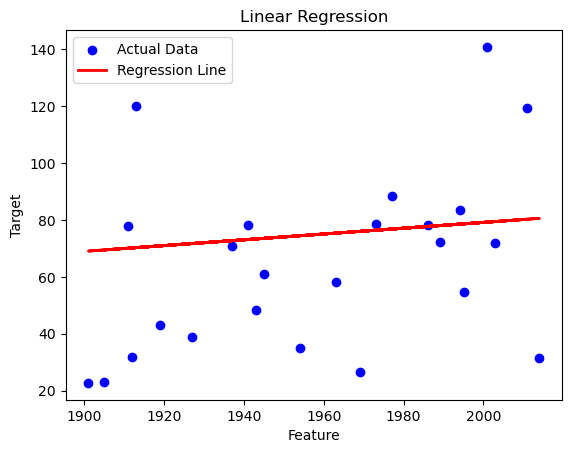

Mean Absolute Error (MAE) of the test data: 25.268734500441692
Mean Squared Error (MSE) of the test data: 994.4346692358858
Root Mean Squared Error (RMSE) of the test data: 31.534658222912228


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
# Assuming 'features' and 'target' are the columns used for prediction
features = data[['YEAR']]  # Replace with your actual features
target = data['Rainfall in June']  # Replace with your actual target column

# Split the data into training and testing sets using the 80-20 rule
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build the Linear Regression model
model = LinearRegression().fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)
# Plot the regression line
plt.scatter(x_test, y_test, color='blue', label='Actual Data')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Evaluate the model using metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE) of the test data: {mae}")
print(f"Mean Squared Error (MSE) of the test data: {mse}")
print(f"Root Mean Squared Error (RMSE) of the test data: {rmse}")

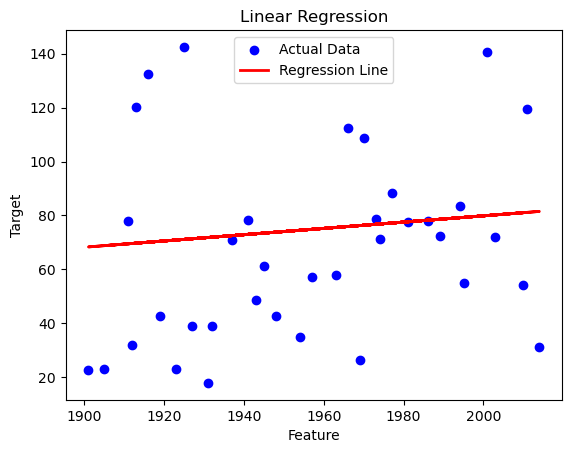

Mean Absolute Error (MAE) of the test data: 28.440906040640492
Mean Squared Error (MSE) of the test data: 1205.8044489260685
Root Mean Squared Error (RMSE) of the test data: 34.72469508758959


In [35]:
# Assuming 'features' and 'target' are the columns used for prediction
features = data[['YEAR']]  # Replace with your actual features
target = data['Rainfall in June']  # Replace with your actual target column

# Split the data into training and testing sets using the 80-20 rule
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Build the Linear Regression model
model = LinearRegression().fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)
# Plot the regression line
plt.scatter(x_test, y_test, color='blue', label='Actual Data')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Evaluate the model using metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE) of the test data: {mae}")
print(f"Mean Squared Error (MSE) of the test data: {mse}")
print(f"Root Mean Squared Error (RMSE) of the test data: {rmse}")